In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms 
import torchvision

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_set = datasets.CIFAR10('./data',
    train=True, download=True,
    transform=preprocess,
    target_transform = None,)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
train_set.data.shape

(50000, 32, 32, 3)

In [0]:
data, target = next(iter(train_loader))

In [9]:
data.shape

torch.Size([100, 3, 224, 224])

In [10]:
data[0]

tensor([[[0.3059, 0.3137, 0.3216,  ..., 0.7529, 0.7529, 0.7490],
         [0.2824, 0.2902, 0.2980,  ..., 0.7490, 0.7490, 0.7451],
         [0.2588, 0.2667, 0.2745,  ..., 0.7451, 0.7451, 0.7412],
         ...,
         [0.4745, 0.4784, 0.4863,  ..., 0.5333, 0.5333, 0.5333],
         [0.4863, 0.4902, 0.4941,  ..., 0.5333, 0.5333, 0.5333],
         [0.4941, 0.4980, 0.5020,  ..., 0.5373, 0.5373, 0.5373]],

        [[0.3529, 0.3608, 0.3686,  ..., 0.7922, 0.7922, 0.7882],
         [0.3294, 0.3373, 0.3451,  ..., 0.7882, 0.7882, 0.7843],
         [0.3059, 0.3137, 0.3216,  ..., 0.7843, 0.7843, 0.7804],
         ...,
         [0.5373, 0.5412, 0.5451,  ..., 0.5882, 0.5882, 0.5882],
         [0.5451, 0.5490, 0.5569,  ..., 0.5882, 0.5882, 0.5882],
         [0.5529, 0.5569, 0.5647,  ..., 0.5922, 0.5882, 0.5882]],

        [[0.4039, 0.4118, 0.4196,  ..., 0.8510, 0.8471, 0.8471],
         [0.3804, 0.3882, 0.3961,  ..., 0.8471, 0.8431, 0.8431],
         [0.3569, 0.3647, 0.3725,  ..., 0.8431, 0.8392, 0.

In [0]:
import pylab as plt

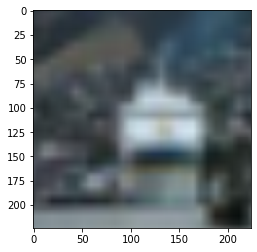

In [12]:
plt.imshow(data[4].transpose(0,2).transpose(0,1))

In [13]:
net = torchvision.models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [17]:
data[0:1].shape

torch.Size([1, 3, 224, 224])

In [0]:
out = net(data[0:1])

In [0]:
def get_imagenet_labels():
    import requests
    LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
    imagenet_labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}
    return imagenet_labels

In [0]:
map = get_imagenet_labels()

In [34]:
import numpy as np
np.argsort(out.detach().cpu().numpy())

array([[107, 317, 396, 321, 562, 397, 983,  55, 816, 928, 819, 393, 309,
          6, 305, 908, 348, 315,  58, 327, 963, 947,  74,  23,  50, 933,
        991, 304, 973, 311, 467, 581,  37,  88,  57, 815,   4, 929, 346,
        992,  97, 133, 850, 329,  93, 316,  30, 312, 123,   9, 144, 108,
         67, 863, 333, 788,  76,  94, 124, 580,  90, 829, 130,  24, 924,
        982, 308, 961,  11, 679, 843, 658,  14, 313,  77, 950, 476, 735,
         12, 915, 971, 323,  13, 595, 709, 325,  49,  25,  39, 614, 953,
        552, 568,   7, 517, 958, 454, 640, 138, 509,  19, 682, 136,  31,
        661, 997,  46, 611,  96, 839, 888, 489, 820, 115, 555,  18, 100,
          2, 203, 125,  48, 637, 721, 286, 965,  61, 858, 336, 608, 609,
        879, 307, 109, 984,  17, 114, 127, 301,  40, 498, 391,  56,  22,
        737, 320, 957,  89, 129, 603,  15, 322, 560, 448, 306, 565, 134,
        652, 119, 414, 607, 547, 943, 913, 993, 989, 343, 324,  35, 131,
         84, 920, 655, 895, 328, 866, 779, 110,   8

In [36]:
map[901]

'whiskey jug'